Universidad Del Valle de Guatemala  
Departamento de Computación  
Minería de datos  

Proyecto - Análisis exploratorio  
José Pablo Kiesling Lange - 21581  
Erick Stiv Junior Guerra Muñoz - 21781  
Diego Andrés Morales Aquino - 21762  
Pablo Andrés Zamora Vásquez - 21780

<h1><center>Inicio del proyecto</center></h1>

In [ ]:
import pandas as pd
import numpy as np


# Ordenamiento y limpieza de datos

### Cargar y modelar datos generales

In [ ]:
ods_data = pd.read_csv("ODS_indicators.csv")

In [ ]:
ods_data.drop(["Country Name", "Indicator Code"], axis=1, inplace=True)
#ods_data.drop([str(year) for year in range(1990, 2005)], axis=1, inplace=True)

In [ ]:

melted_df = ods_data.melt(id_vars=['Country Code', 'Indicator Name'], var_name='Year', value_name='Value')


ods_data = melted_df.pivot_table(index=['Country Code', 'Year'], columns='Indicator Name', values='Value')


ods_data.reset_index(inplace=True)

ods_data

Indicator Name,Country Code,Year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescent fertility rate (births per 1000 women ages 15-19),Adolescents out of school (% of lower secondary school age),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP per capita (current US$),Households and NPISHs Final consumption expenditure (annual % growth),Individuals using the Internet (% of population),People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),People using safely managed drinking water services (% of population),Primary completion rate total (% of relevant age group),Unemployment total (% of total labor force) (modeled ILO estimate),Urban population (% of total population)
0,ABW,1990,NaN,100.000000,50.2700,NaN,NaN,NaN,NaN,12305.387910,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,50.319
1,ABW,1991,NaN,99.153656,49.7000,NaN,NaN,NaN,NaN,13494.685160,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,50.304
2,ABW,1992,NaN,99.197128,49.1300,NaN,NaN,NaN,NaN,14048.347270,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,49.998
3,ABW,1993,NaN,99.239914,48.7648,NaN,NaN,NaN,NaN,14942.274960,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,49.588
4,ABW,1994,NaN,100.000000,48.3996,NaN,NaN,NaN,NaN,16241.575590,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,49.177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8078,ZWE,2016,29.8,42.561729,90.6766,2.261470,66.879997,7.05,26.070000,1464.588957,-10.501114,23.119989,64.468964,37.529193,30.183683,99.265839,4.788,32.296
8079,ZWE,2017,29.8,44.178635,86.1350,2.356790,66.480003,6.90,26.629999,1235.189032,1.396143,24.400000,63.996625,36.941673,29.997683,95.476372,4.785,32.237
8080,ZWE,2018,29.9,45.572647,83.2486,6.226070,66.019997,6.75,27.230000,1254.642265,-22.393220,25.000000,63.538773,36.357160,29.827913,92.195152,4.796,32.209
8081,ZWE,2019,30.1,46.781475,80.3622,7.544310,66.190002,6.57,27.240000,1316.740657,NaN,25.100000,63.094957,35.774337,29.673569,88.508812,4.833,32.210


### Cargar y moldear datos de indicadores


In [ ]:
indicators_data = pd.read_csv("HDR23-24_Composite_indices_complete_time_series.csv",  encoding='latin1')

In [ ]:
# Eliminar columnas
indicators_data = indicators_data.drop(["hdicode","region"], axis=1)
indicators_data = indicators_data.rename(columns={"iso3":"Country Code"})

In [ ]:

# Usar pd.melt para aplanar el DataFrame
df_melted = pd.melt(indicators_data, id_vars=['Country Code', 'country'], var_name='variable_year', value_name='value')

# Separar 'variable' y 'year' usando rsplit
df_melted[['variable', 'Year']] = df_melted['variable_year'].str.rsplit('_', n=1, expand=True)

# Pivotar para tener una columna por cada variable
indicators_data = df_melted.pivot_table(index=['Country Code', 'country', 'Year'], columns='variable', values='value').reset_index()

# Eliminar variables extras
columns_to_keep = ['Country Code', 'country', 'Year', 'hdi', 'eys', 'le', 'mys', 'pop_total']

# Seleccionar solo las columnas que están en la lista
indicators_data = indicators_data.loc[:, columns_to_keep]
indicators_data

# hdi - IDH
# eys: Años esperados de escolarización (Expected Years of Schooling)
# le: Esperanza de vida al nacer (Life Expectancy)
# mys: Años medios de escolarización (Mean Years of Schooling)
# pop_total: Población total
# ineq_edu: Desigualdad en educación
# ineq_inc: Desigualdad en ingresos
# coef_ineq: Coeficiente de desigualdad (posiblemente el coeficiente de Gini)


variable,Country Code,country,Year,hdi,eys,le,mys,pop_total
0,AFG,Afghanistan,1990,0.284,2.936460,45.967000,0.871962,10.694796
1,AFG,Afghanistan,1991,0.292,3.228456,46.663000,0.915267,10.745167
2,AFG,Afghanistan,1992,0.299,3.520452,47.596000,0.958573,12.057433
3,AFG,Afghanistan,1993,0.307,3.812448,51.466000,1.001878,14.003760
4,AFG,Afghanistan,1994,0.300,4.104445,51.495000,1.045184,15.455554
...,...,...,...,...,...,...,...,...
6793,ZZK.WORLD,World,2018,0.735,12.651182,72.816178,8.483187,7649.567694
6794,ZZK.WORLD,World,2019,0.739,12.726141,73.012121,8.574383,7730.660623
6795,ZZK.WORLD,World,2020,0.736,12.860674,72.257355,8.686374,7806.602793
6796,ZZK.WORLD,World,2021,0.735,12.911840,71.365524,8.682265,7874.877719


### Juntar conjunto de datos


In [ ]:
data = pd.merge(ods_data, indicators_data, on=['Country Code', 'Year'])
data

,Country Code,Year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescent fertility rate (births per 1000 women ages 15-19),Adolescents out of school (% of lower secondary school age),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP per capita (current US$),...,People using safely managed drinking water services (% of population),Primary completion rate total (% of relevant age group),Unemployment total (% of total labor force) (modeled ILO estimate),Urban population (% of total population),country,hdi,eys,le,mys,pop_total
0,AFG,1990,NaN,NaN,162.8354,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,21.177,Afghanistan,0.284,2.936460,45.967,0.871962,10.694796
1,AFG,1991,NaN,NaN,163.3822,NaN,63.430000,12.43,24.139999,NaN,...,NaN,NaN,10.649,21.266,Afghanistan,0.292,3.228456,46.663,0.915267,10.745167
2,AFG,1992,NaN,NaN,163.9290,NaN,63.650002,12.21,24.139999,NaN,...,NaN,NaN,10.821,21.355,Afghanistan,0.299,3.520452,47.596,0.958573,12.057433
3,AFG,1993,NaN,NaN,164.1888,NaN,64.410004,11.57,24.030001,NaN,...,NaN,27.575171,10.723,21.444,Afghanistan,0.307,3.812448,51.466,1.001878,14.003760
4,AFG,1994,NaN,NaN,164.4486,NaN,64.440002,11.48,24.080000,NaN,...,NaN,NaN,10.726,21.534,Afghanistan,0.300,4.104445,51.495,1.045184,15.455554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,ZWE,2016,29.8,42.561729,90.6766,2.261470,66.879997,7.05,26.070000,1464.588957,...,30.183683,99.265839,4.788,32.296,Zimbabwe,0.547,10.899038,60.306,8.425370,14.452704
6041,ZWE,2017,29.8,44.178635,86.1350,2.356790,66.480003,6.90,26.629999,1235.189032,...,29.997683,95.476372,4.785,32.237,Zimbabwe,0.552,10.930538,60.709,8.461690,14.751101
6042,ZWE,2018,29.9,45.572647,83.2486,6.226070,66.019997,6.75,27.230000,1254.642265,...,29.827913,92.195152,4.796,32.209,Zimbabwe,0.564,10.962130,61.414,8.574575,15.052184
6043,ZWE,2019,30.1,46.781475,80.3622,7.544310,66.190002,6.57,27.240000,1316.740657,...,29.673569,88.508812,4.833,32.210,Zimbabwe,0.560,10.993813,61.292,8.687460,15.354608


In [ ]:
# hdi - IDH
# eys: Años esperados de escolarización (Expected Years of Schooling)
# le: Esperanza de vida al nacer (Life Expectancy)
# mys: Años medios de escolarización (Mean Years of Schooling)
# pop_total: Población total
# ineq_edu: Desigualdad en educación
# ineq_inc: Desigualdad en ingresos
# coef_ineq: Coeficiente de desigualdad (posiblemente el coeficiente de Gini)

data.columns

Index(['Country Code', 'Year',
       'Access to clean fuels and technologies for cooking (% of population)',
       'Access to electricity (% of population)',
       'Adolescent fertility rate (births per 1000 women ages 15-19)',
       'Adolescents out of school (% of lower secondary school age)',
       'Employment in agriculture (% of total employment) (modeled ILO estimate)',
       'Employment in industry (% of total employment) (modeled ILO estimate)',
       'Employment in services (% of total employment) (modeled ILO estimate)',
       'GDP per capita (current US$)',
       'Households and NPISHs Final consumption expenditure (annual % growth)',
       'Individuals using the Internet (% of population)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic sanitation services (% of population)',
       'People using safely managed drinking water services (% of population)',
       'Primary completion rate total (% o

In [ ]:
data.dtypes

Country Code                                                                 object
Year                                                                         object
Access to clean fuels and technologies for cooking (% of population)        float64
Access to electricity (% of population)                                     float64
Adolescent fertility rate (births per 1000 women ages 15-19)                float64
Adolescents out of school (% of lower secondary school age)                 float64
Employment in agriculture (% of total employment) (modeled ILO estimate)    float64
Employment in industry (% of total employment) (modeled ILO estimate)       float64
Employment in services (% of total employment) (modeled ILO estimate)       float64
GDP per capita (current US$)                                                float64
Households and NPISHs Final consumption expenditure (annual % growth)       float64
Individuals using the Internet (% of population)                            

### Limpieza de datos

In [ ]:
# Eliminar columnas
df_clean = data.drop(['People using safely managed drinking water services (% of population)', 'Adolescents out of school (% of lower secondary school age)', 'Households and NPISHs Final consumption expenditure (annual % growth)'], axis=1)

In [ ]:
print("Valores pre limpieza")
print("Valores NaN:\n", df_clean.isna().sum())

numeric_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns
column_means = df_clean[numeric_columns].mean()
#df_clean =  data.copy()  # Copia del DataFrame original para no modificarlo directamente
df_clean[numeric_columns] = df_clean[numeric_columns].fillna(column_means)
#print("Valores NaN:\n", df_clean.isna().sum())
#df_clean = df_clean.dropna()

Valores pre limpieza
Valores NaN:
 Country Code                                                                   0
Year                                                                           0
Access to clean fuels and technologies for cooking (% of population)        2059
Access to electricity (% of population)                                      787
Adolescent fertility rate (births per 1000 women ages 15-19)                 310
Employment in agriculture (% of total employment) (modeled ILO estimate)     825
Employment in industry (% of total employment) (modeled ILO estimate)        825
Employment in services (% of total employment) (modeled ILO estimate)        825
GDP per capita (current US$)                                                 247
Individuals using the Internet (% of population)                             336
People using at least basic drinking water services (% of population)       2025
People using at least basic sanitation services (% of population)         

In [ ]:
df_clean

,Country Code,Year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adolescent fertility rate (births per 1000 women ages 15-19),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),GDP per capita (current US$),Individuals using the Internet (% of population),...,People using at least basic sanitation services (% of population),Primary completion rate total (% of relevant age group),Unemployment total (% of total labor force) (modeled ILO estimate),Urban population (% of total population),country,hdi,eys,le,mys,pop_total
0,AFG,1990,62.983721,79.109812,162.8354,30.544245,19.891328,49.565843,11208.654030,0.000000,...,71.981983,85.880304,8.220484,21.177,Afghanistan,0.284,2.936460,45.967,0.871962,10.694796
1,AFG,1991,62.983721,79.109812,163.3822,63.430000,12.430000,24.139999,11208.654030,0.000000,...,71.981983,85.880304,10.649000,21.266,Afghanistan,0.292,3.228456,46.663,0.915267,10.745167
2,AFG,1992,62.983721,79.109812,163.9290,63.650002,12.210000,24.139999,11208.654030,0.000000,...,71.981983,85.880304,10.821000,21.355,Afghanistan,0.299,3.520452,47.596,0.958573,12.057433
3,AFG,1993,62.983721,79.109812,164.1888,64.410004,11.570000,24.030001,11208.654030,0.000000,...,71.981983,27.575171,10.723000,21.444,Afghanistan,0.307,3.812448,51.466,1.001878,14.003760
4,AFG,1994,62.983721,79.109812,164.4486,64.440002,11.480000,24.080000,11208.654030,0.000000,...,71.981983,85.880304,10.726000,21.534,Afghanistan,0.300,4.104445,51.495,1.045184,15.455554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,ZWE,2016,29.800000,42.561729,90.6766,66.879997,7.050000,26.070000,1464.588957,23.119989,...,37.529193,99.265839,4.788000,32.296,Zimbabwe,0.547,10.899038,60.306,8.425370,14.452704
6041,ZWE,2017,29.800000,44.178635,86.1350,66.480003,6.900000,26.629999,1235.189032,24.400000,...,36.941673,95.476372,4.785000,32.237,Zimbabwe,0.552,10.930538,60.709,8.461690,14.751101
6042,ZWE,2018,29.900000,45.572647,83.2486,66.019997,6.750000,27.230000,1254.642265,25.000000,...,36.357160,92.195152,4.796000,32.209,Zimbabwe,0.564,10.962130,61.414,8.574575,15.052184
6043,ZWE,2019,30.100000,46.781475,80.3622,66.190002,6.570000,27.240000,1316.740657,25.100000,...,35.774337,88.508812,4.833000,32.210,Zimbabwe,0.560,10.993813,61.292,8.687460,15.354608


### Profile report

In [ ]:
from ydata_profiling import ProfileReport 

In [ ]:
#profile = ProfileReport(df_clean)
#profile

# Modelo de regresión

In [ ]:
# Seleccionar variables dependientes e independientes
target_column = 'eys'
columns_to_ignore = ['country']
feature_columns = [col for col in df_clean.columns if col != target_column and col not in columns_to_ignore]  # Todas las columnas excepto la dependiente

# Obtener los valores de las variables independientes y dependientes
X = df_clean[feature_columns].values
y = df_clean[target_column].values

In [ ]:
X

array([['AFG', '1990', 62.9837205218264, ..., 45.967, 0.871961963,
        10.694796],
       ['AFG', '1991', 62.9837205218264, ..., 46.663, 0.915267456,
        10.745167],
       ['AFG', '1992', 62.9837205218264, ..., 47.596, 0.95857295,
        12.057433],
       ...,
       ['ZWE', '2018', 29.9, ..., 61.414, 8.574574947, 15.052184],
       ['ZWE', '2019', 30.1, ..., 61.292, 8.687459946, 15.3546075],
       ['ZWE', '2020', 30.4, ..., 61.124, 8.807762621, 15.669666]],
      dtype=object)

### Codificar variables categóricas

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Codificar codigo de país
encoder_country_code = ColumnTransformer(transformers=[
    ('encoder_country_code', OneHotEncoder(), [0])
    ], remainder='passthrough', sparse_threshold=0)
X = np.array(encoder_country_code.fit_transform(X))

### Separación de conjuntos de datos

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Dividir conjunto de datos en datos de prueba y datos de entrenamiento 
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Prueba de modelos

In [ ]:
from sklearn.metrics import r2_score

### Regresión lineal múltiple

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regresor_lin = LinearRegression()
regresor_lin.fit(X_entreno, y_entreno)

# R-cuadrado utilizando datos de prueba
y_pred = regresor_lin.predict(X_prueba)
print(f'R cuadrado (datos de prueba): {r2_score(y_prueba, y_pred)}')

R cuadrado (datos de prueba): 0.9248983061210498


### Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeRegressor

#### Gridsearch para variar parámetros

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = DecisionTreeRegressor()

# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.01, 0.1, 1.0]
}

# Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Ajustar el modelo
grid_search.fit(X_entreno, y_entreno)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros encontrados:", best_params)


Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] END ccp_alpha=0.0, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END ccp_alpha=0.0, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=10; 

d:\ProgramData\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
720 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "d:\ProgramData\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\ProgramData\Python311\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "d:\ProgramData\Python311\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "d:\ProgramData\Python311\Lib\site-packa

Mejores parámetros encontrados: {'ccp_alpha': 0.0, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


#### Modelo seleccionado

In [ ]:

regresor_tree = DecisionTreeRegressor(random_state = 0)
regresor_tree.fit(X_entreno, y_entreno)



0.9452995028605016

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#### Grid search

In [ ]:
model = RandomForestRegressor(random_state=0)

# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {
    'n_estimators': [100, 200, 300, 1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Ajustar el modelo
grid_search.fit(X_entreno, y_entreno)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros encontrados:", best_params)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Mejores parámetros encontrados: {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


In [ ]:
regresor_ranf = RandomForestRegressor(n_estimators = 1000, bootstrap=False, max_features='log2', random_state = 0)
regresor_ranf.fit(X_entreno, y_entreno)

y_pred = regresor_ranf.predict(X_prueba)
r2_score(y_prueba, y_pred)

0.9790219483409287

### Regresión SVR

In [ ]:
from sklearn.svm import SVR

#### Normalización de datos

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Normalizar datos

normalizador_X = StandardScaler()
normalizador_y = StandardScaler()
X_entreno_norm = normalizador_X.fit_transform(X_entreno)
y_entreno_norm = normalizador_y.fit_transform(y_entreno.reshape(len(y_entreno),1))

#### Grid search

In [ ]:
regresor_svr = SVR()
param_grid = {
    'C': [0.1, 1, 10, 100, 500, 1000], #10
    'epsilon': [0.01, 0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
}

# Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=regresor_svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Ajustar el modelo
grid_search.fit(X_entreno_norm, y_entreno_norm)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros encontrados:", best_params)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


d:\ProgramData\Python311\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mejores parámetros encontrados: {'gamma': 'scale'}


#### Modelo svr


In [ ]:

regresor_svr = SVR(C=500, epsilon=0.01, kernel='rbf', gamma='scale')
regresor_svr.fit(X_entreno_norm, y_entreno_norm)

y_pred = normalizador_y.inverse_transform(regresor_svr.predict(normalizador_X.transform(X_prueba)).reshape(-1,1))
r2_score(y_prueba, y_pred)

d:\ProgramData\Python311\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9821458554828595

# Predicciones

In [ ]:
#obtener el valor 500 de df_clean
df_clean.iloc[2200]

Country Code                                                                        GTM
Year                                                                               2020
Access to clean fuels and technologies for cooking (% of population)               50.1
Access to electricity (% of population)                                       97.055267
Adolescent fertility rate (births per 1000 women ages 15-19)                     67.408
Employment in agriculture (% of total employment) (modeled ILO estimate)      30.544245
Employment in industry (% of total employment) (modeled ILO estimate)         19.891328
Employment in services (% of total employment) (modeled ILO estimate)         49.565843
GDP per capita (current US$)                                                4603.339643
Individuals using the Internet (% of population)                                  49.97
People using at least basic drinking water services (% of population)         94.006428
People using at least basic sani

#### Guatemala en 2020

In [ ]:
prediccion_pais_real = [[
    'GTM', 2020, 50.1, 97.055267, 67.408, 30.544245, 19.891328, 49.565843, 4603.339643, 49.97, 94.006428, 67.928581, 80.736687, 3.553, 51.836, 0.638, 71.797, 5.668648, 17.362718
]]

In [ ]:
val = encoder_country_code.transform(prediccion_pais_real)

In [ ]:
# predicción con svr
pred_svr = normalizador_y.inverse_transform(regresor_svr.predict(normalizador_X.transform(val)).reshape(-1,1))
print(f'Predicción SVR: {pred_svr[0][0]}')

Predicción SVR: 10.887570417565815


In [ ]:
# prediccion con lineal multiple
pred_lin = regresor_lin.predict(val)
print(f'Predicción Lineal: {pred_lin[0]}')

Predicción Lineal: 11.434011919784325


In [ ]:
# prediccion con arbol de decision
pred_tree = regresor_tree.predict(val)
print(f'Predicción Árbol de decisión: {pred_tree[0]}')

Predicción Árbol de decisión: 10.79391956


In [ ]:
# predicción con random forest
pred_ranf = regresor_ranf.predict(val)
print(f'Predicción Random Forest: {pred_ranf[0]}')

Predicción Random Forest: 11.481924479982473


#### Predicciones de Guatemala hasta 2070

In [ ]:
prediccion_guatemala_2020 = [[
    'GTM', 2020, 50.1, 97.055267, 67.408, 30.544245, 19.891328, 49.565843, 4603.339643, 49.97, 94.006428, 67.928581, 80.736687, 3.553, 51.836, 0.638, 71.797, 5.668648, 17.362718
]]
prediccion_guatemala_2030 = [[
    'GTM', 2030, 50.1, 97.055267, 67.408, 30.544245, 19.891328, 49.565843, 4603.339643, 49.97, 94.006428, 67.928581, 80.736687, 3.553, 51.836, 0.638, 71.797, 5.668648, 17.362718
]]
prediccion_guatemala_2040 = [[
    'GTM', 2040, 50.1, 97.055267, 67.408, 30.544245, 19.891328, 49.565843, 4603.339643, 49.97, 94.006428, 67.928581, 80.736687, 3.553, 51.836, 0.638, 71.797, 5.668648, 17.362718
]]
prediccion_guatemala_2050 = [[
    'GTM', 2050, 50.1, 97.055267, 67.408, 30.544245, 19.891328, 49.565843, 4603.339643, 49.97, 94.006428, 67.928581, 80.736687, 3.553, 51.836, 0.638, 71.797, 5.668648, 17.362718
]]
prediccion_guatemala_2060 = [[
    'GTM', 2060, 50.1, 97.055267, 67.408, 30.544245, 19.891328, 49.565843, 4603.339643, 49.97, 94.006428, 67.928581, 80.736687, 3.553, 51.836, 0.638, 71.797, 5.668648, 17.362718
]]
prediccion_guatemala_2070 = [[
    'GTM', 2070, 50.1, 97.055267, 67.408, 30.544245, 19.891328, 49.565843, 4603.339643, 49.97, 94.006428, 67.928581, 80.736687, 3.553, 51.836, 0.638, 71.797, 5.668648, 17.362718
]]

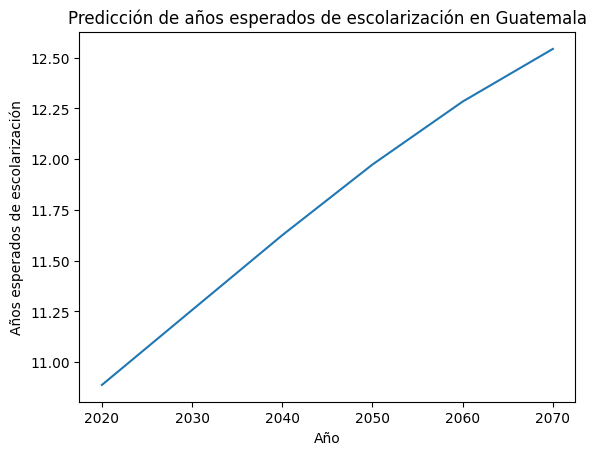

In [ ]:
# para cada prediccion se obtiene el valor de la prediccion con cada modelo
predicciones = [prediccion_guatemala_2020, prediccion_guatemala_2030, prediccion_guatemala_2040, prediccion_guatemala_2050, prediccion_guatemala_2060, prediccion_guatemala_2070]
values = []
for prediccion in predicciones:
    val = encoder_country_code.transform(prediccion)
    pred_svr = normalizador_y.inverse_transform(regresor_svr.predict(normalizador_X.transform(val)).reshape(-1,1))
    values.append(pred_svr[0][0])
    
# graficar los valores de las predicciones
import matplotlib.pyplot as plt

plt.plot([2020, 2030, 2040, 2050, 2060, 2070], values)
plt.xlabel('Año')
plt.ylabel('Años esperados de escolarización')
plt.title('Predicción de años esperados de escolarización en Guatemala')
plt.show()

In [ ]:
# sacar la ecuación de values
from numpy.polynomial.polynomial import Polynomial

x = [2020, 2030, 2040, 2050, 2060, 2070]
y = values

p = Polynomial.fit(x, y, 2)
print(p)

11.80254213 + 0.83618917 x - 0.08746796 x**2
